# Template matching

In [ ]:
'''
Object detection by template matching
follow: https://www.youtube.com/watch?v=P5FTEryiTl4
'''
import cv2
import os
import matplotlib.pyplot as plt
from pathlib import Path


script_dir = Path("D:\\VSC\\machine-learning-crash-course\\deep-neural-networks\\computer-vision\\template_matching.ipynb").resolve()
project_root = script_dir.parent.parent.parent
img_dir = os.path.join(project_root, "images")

In [2]:
img_rgb = cv2.imread(os.path.join(img_dir, 'f16.jpg')) # BGR
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread(os.path.join(img_dir, 'f16_template.jpg'), 0 )


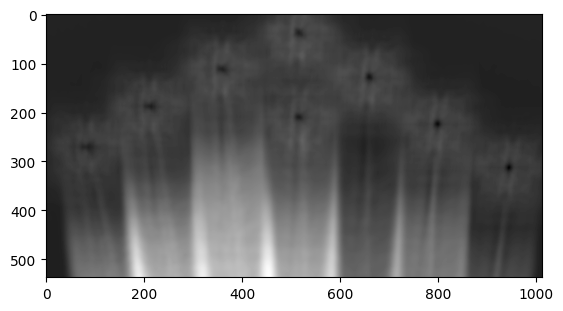

In [3]:
h, w = template.shape[::]
res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF)
plt.imshow(res, cmap='gray')

In [4]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = min_loc
bottom_right = [top_left[0] + w, top_left[1] + h]
cv2.rectangle(img_gray, top_left, bottom_right, 255, 2)

cv2.imshow("matched",img_gray)
cv2.waitKey()
cv2.destroyAllWindows()

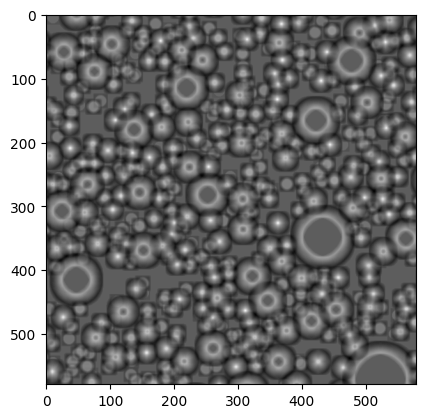

In [8]:
import numpy as np

img_rgb = cv2.imread(os.path.join(img_dir, "bubbles.png"))
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread(os.path.join(img_dir, "bubbles_template.png"), 0)
h, w = template.shape[::]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
plt.imshow(res,cmap='gray')

threshold = 0.8
loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

cv2.imshow("matched",img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()